
# Investigate a Dataset - TMDb Movie Data Analysis.

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

>**Info**: This data set contains information about more than 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue, it consists of 21 columns each represent unique info about the movie as imdb_id, budget, revenue, genres & vote counts.


### Question(s) for Analysis
    1. What's the most popular genres over years?
    2. which genres have the highest average revenue over decades?
    3. correlation between revenue and popularity
    4. Most popular cast members in highest grossing movies
    5. what are the Highest movies revenue over the years ? 

In [1]:
# Import Python necessary  package essential for our analysis 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
# Shape of our dataset.
df.shape

(10866, 21)

### Data Assessing

In [4]:
# Display the dataset information (types and look for instances of missing or possibly errant data).
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [5]:
# Display the number of missing values for each column . 
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [6]:
# Check for duplicated rows:
df.duplicated().sum()

1

In [7]:
# display duplicate values
df[df.duplicated()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


#### Summary Statistics

In [8]:
# Display summary statistics for the dataset
df.describe()
# min value is a zero in ('budget','revenue','runtime','budget_adj',revenue_adj) which is treated as nan values as it's irrelevant for our analysis .

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [9]:
# displaying 0-valued data shape across our dataset.
zero_data=df[(df.revenue == 0)|(df.budget == 0)|(df.runtime == 0)]
zero_data.shape

(7011, 21)

In [10]:
# sample of 0-valued parameters in our dataset.
df[df.runtime==0].sample(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
6040,202604,tt3043194,0.011798,0,0,The Vatican Exorcisms,Joe Marino,NaN,Joe Marino,The public were never meant to know,...,Documentary following US film-maker Joe Marino...,0,Horror|Documentary|Mystery,NaN,5/29/13,10,4.7,2013,0.000000e+00,0.0
2315,48373,tt1274296,0.171615,0,0,Listen to Your Heart,Alexia Rasmussen|Kent Moran|Cybill Shepherd|Sh...,http://www.listentoyourheartfilm.com/,NaN,One song can change your life.,...,Danny Foster doesn't have much: an apartment a...,0,Drama|Music|Romance,NaN,8/14/10,29,7.3,2010,0.000000e+00,0.0
5938,191562,tt2436516,0.147188,0,0,Go Goa Gone,Saif Ali Khan|Anand Tiwari|Vir Das|Pooja Gupta,NaN,Krishna D.K.|Raj Nidimoru,NaN,...,"A rave party off the coast of Goa, goes horrif...",0,Comedy|Horror,Eros International,5/10/13,16,5.3,2013,0.000000e+00,0.0
5695,224815,tt2881698,0.417739,0,0,Skinwalker Ranch,Steve Berg|Kyle Davis|Erin Cahill|Jon Gries|De...,NaN,Devin McGinn,NaN,...,In 2010 â€œSkinwalker Ranchâ€ gained media at...,0,Thriller|Horror|Science Fiction,DeepStudios,10/30/13,27,4.3,2013,0.000000e+00,0.0
4063,28004,tt0359639,0.371510,6000000,0,Madea's Family Reunion,Tyler Perry|Blair Underwood|Lynn Whitfield|Bor...,NaN,Tyler Perry,NaN,...,"Just as the southern matriarch, Madea buries h...",0,Comedy,NaN,1/25/02,49,5.9,2002,7.273568e+06,0.0


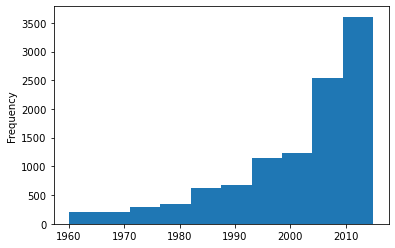

In [11]:
# data release over time 
df.release_year.plot(kind='hist',x="release_year",y="Distrbution");

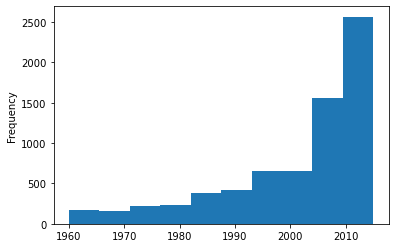

In [12]:
# Missing values distrbution in (revenue,budget,runtime) across the years
zero_data.release_year.plot(kind='hist');
# Most of our dataset contain missing values we want to address that later.

In [13]:
# display frequency of our Movie genres & cast.
display(df.genres.value_counts())
print('-'*80)
display(df.cast.value_counts())

Comedy                                      712
Drama                                       712
Documentary                                 312
Drama|Romance                               289
Comedy|Drama                                280
                                           ... 
Adventure|Animation|Romance                   1
Family|Animation|Drama                        1
Action|Adventure|Animation|Comedy|Family      1
Action|Adventure|Animation|Fantasy            1
Mystery|Science Fiction|Thriller|Drama        1
Name: genres, Length: 2039, dtype: int64

--------------------------------------------------------------------------------


Louis C.K.                                                                        6
William Shatner|Leonard Nimoy|DeForest Kelley|James Doohan|George Takei           5
Bill Burr                                                                         4
Aziz Ansari                                                                       3
Elijah Wood|Ian McKellen|Viggo Mortensen|Liv Tyler|Orlando Bloom                  3
                                                                                 ..
Ray Stevenson|Vincent D'Onofrio|Val Kilmer|Christopher Walken|Linda Cardellini    1
Freida Pinto|Riz Ahmed|Roshan Seth|Kalki Koechlin|Anurag Kashyap                  1
William Hurt|Paul Giamatti|James Woods|Billy Crudup|Topher Grace                  1
Dennis Quaid|Tony Oller|Aimee Teegarden|Stephen Lunsford|Devon Werkheiser         1
Harold P. Warren|Tom Neyman|John Reynolds|Diane Mahree|Stephanie Nielson          1
Name: cast, Length: 10719, dtype: int64


### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

In [14]:
# column indexes/labels
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

### 1.Drop irrelevant columns for our current analysis

In [15]:
df.drop(
    ['homepage','tagline','production_companies','keywords','overview'\
     ,'imdb_id','id','release_date'], inplace = True, axis = 1)

In [16]:
# check for data change
df.columns

Index(['popularity', 'budget', 'revenue', 'original_title', 'cast', 'director',
       'runtime', 'genres', 'vote_count', 'vote_average', 'release_year',
       'budget_adj', 'revenue_adj'],
      dtype='object')

### 2.Drop any missing values (NANs)

In [17]:
df.dropna(inplace = True)

### 3.drop rows that contain zeros values in (revenue_adj,budget_adj,runtime)


In [18]:
zero_data = df[(df.revenue_adj == 0)|(df.budget_adj == 0)|(df.runtime == 0)]
df.drop(zero_data.index,inplace=True)
df.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,2947,7.3,2015,1.747999e+08,1.385749e+09


In [19]:
# info of newly-cleaned data
df.info()
# in this way we've confirmed that our dataset is clean & ready for usuage for furthur analysis

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3850 entries, 0 to 10848
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   popularity      3850 non-null   float64
 1   budget          3850 non-null   int64  
 2   revenue         3850 non-null   int64  
 3   original_title  3850 non-null   object 
 4   cast            3850 non-null   object 
 5   director        3850 non-null   object 
 6   runtime         3850 non-null   int64  
 7   genres          3850 non-null   object 
 8   vote_count      3850 non-null   int64  
 9   vote_average    3850 non-null   float64
 10  release_year    3850 non-null   int64  
 11  budget_adj      3850 non-null   float64
 12  revenue_adj     3850 non-null   float64
dtypes: float64(4), int64(5), object(4)
memory usage: 421.1+ KB


In [20]:
# sample of our clean dataset
df.sample(10)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
9064,0.469693,30000000,19204929,The Replacement Killers,Chow Yun-fat|Mira Sorvino|Michael Rooker|Kenne...,Antoine Fuqua,87,Drama|Action|Crime|Thriller,62,6.2,1998,4.013086e+07,2.569035e+07
2479,0.614007,25000000,84565230,Never Been Kissed,Drew Barrymore|David Arquette|Michael Vartan|M...,Raja Gosnell,107,Romance|Comedy|Drama,196,5.7,1999,3.272632e+07,1.107004e+08
4411,1.588457,260000000,284139100,John Carter,Taylor Kitsch|Lynn Collins|Mark Strong|Willem ...,Andrew Stanton,132,Action|Adventure|Fantasy|Science Fiction,1479,6.0,2012,2.469335e+08,2.698595e+08
2658,1.456526,16000000,66468332,Not Another Teen Movie,Chyler Leigh|Chris Evans|Jaime Pressly|Eric Ch...,Joel Gallen,89,Comedy,223,5.3,2001,1.970381e+07,8.185496e+07
9145,0.188201,1100000,631221,Strangeland,Kevin Gage|Elizabeth PeÃ±a|Brett Harrelson|Rob...,John Pieplow,86,Horror,14,4.8,1998,1.471465e+06,8.443815e+05
1564,0.520419,15000000,5024782,Solitary Man,Michael Douglas|Jesse Eisenberg|Susan Sarandon...,Brian Koppelman|David Levien,90,Comedy|Drama|Romance,42,5.7,2009,1.524601e+07,5.107191e+06
10402,1.022408,2500000,50700000,Bonnie and Clyde,Warren Beatty|Faye Dunaway|Michael J. Pollard|...,Arthur Penn,111,Crime|Drama,153,7.6,1967,1.634191e+07,3.314139e+08
4201,0.983841,15000000,94000000,The Crow,Brandon Lee|Rochelle Davis|Ernie Hudson|Michae...,Alex Proyas,102,Fantasy|Action|Thriller,505,7.2,1994,2.206667e+07,1.382845e+08
2584,0.198126,38000000,635096,Ride with the Devil,Tobey Maguire|Skeet Ulrich|Jeffrey Wright|Jewe...,Ang Lee,138,Drama|War|Romance|Western,15,6.6,1999,4.974401e+07,8.313742e+05
10381,0.128982,2000000,54207,Return of the Living Dead 3,Melinda Clarke|J. Trevor Edmond|Kent McCord|Sa...,Brian Yuzna,97,Horror|Romance|Science Fiction,34,5.6,1993,3.018940e+06,8.182384e+04


In [21]:
# Descriptive statistics of our cleaned dataset
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,3850.000000,3.850000e+03,3.850000e+03,3850.000000,3850.000000,3850.000000,3850.000000,3.850000e+03,3.850000e+03
mean,1.192778,3.724698e+07,1.077871e+08,109.212987,528.278442,6.168390,2001.260519,4.428989e+07,1.371959e+08
std,1.475462,4.221167e+07,1.766030e+08,19.913488,880.245090,0.794817,11.285056,4.480837e+07,2.161848e+08
min,0.001117,1.000000e+00,2.000000e+00,15.000000,10.000000,2.200000,1960.000000,9.693980e-01,2.370705e+00
25%,0.463380,1.000000e+07,1.363273e+07,95.000000,71.000000,5.700000,1995.000000,1.317218e+07,1.841498e+07
50%,0.798343,2.400000e+07,4.488472e+07,106.000000,204.500000,6.200000,2004.000000,3.004524e+07,6.179073e+07
75%,1.372826,5.000000e+07,1.242969e+08,119.000000,580.750000,6.700000,2010.000000,6.072867e+07,1.633775e+08
max,32.985763,4.250000e+08,2.781506e+09,338.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


### 4.Sorting data release data into decades for Exploratory analysis by using pd.cut() function.

In [22]:
bins_edges=[1960,1970,1980,1990,2000,2010,2015]
bins_names=['1960s','1970s','1980s','1990s','2000s','2010s']
df.release_year = pd.cut(df.release_year, bins_edges, labels = bins_names)

In [23]:
df.release_year.value_counts()

2000s    1530
2010s     861
1990s     808
1980s     424
1970s     145
1960s      77
Name: release_year, dtype: int64

### 5.Seperate Data contained in Cast & Genres into Multiple values [Source](https://nfpdiscussions.udacity.com/t/tmdb-movie-dataset-problem-with-cast-and-genres-columns/144587)

In [24]:
# Columns like cast & genres contain several values contained in a single cell separated by the "|" ,
# so we need to separate these values to make a more appropriate analysis.
def seprate_values(col):
    new_cols=(df[col].str.split('|', expand=True).rename(columns=lambda x: f"{col}_{x+1}"))
    return new_cols

In [25]:
df_gen = seprate_values('genres')

In [26]:
df_cast = seprate_values('cast')

In [27]:
df['cast'],df['genres']=df_cast['cast_1'],df_gen['genres_1']

In [28]:
display(df['cast'].value_counts().nlargest(10))
print('-'*60)
display(df['genres'].value_counts().nlargest(10))

Nicolas Cage             37
Bruce Willis             32
Johnny Depp              30
Sylvester Stallone       29
Robert De Niro           28
Denzel Washington        28
Tom Hanks                28
Tom Cruise               27
Arnold Schwarzenegger    26
Adam Sandler             24
Name: cast, dtype: int64

------------------------------------------------------------


Drama              889
Comedy             787
Action             689
Adventure          314
Horror             275
Crime              172
Thriller           160
Fantasy            110
Animation          103
Science Fiction     98
Name: genres, dtype: int64

<a id='eda'></a>
## Exploratory Data Analysis
### Research Question 1 ( What's the most popular genres over years? )

In [65]:
df.groupby(["release_year","genres"])['popularity'].size().unstack()

genres,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
release_year,,,,,,,,,,,,,,,,,,,
1960s,12,15,1,10,6,0,18,1,0,2,3,2,1,0,1,0,0,1,4
1970s,28,15,2,18,12,0,34,1,2,0,18,2,2,1,7,0,2,0,1
1980s,73,51,5,83,17,2,71,4,21,0,52,4,1,4,20,0,13,3,0
1990s,159,53,16,174,43,2,184,7,29,4,52,5,9,19,18,1,31,1,1
2000s,269,128,44,351,58,19,368,16,40,4,94,9,15,23,25,0,53,7,7
2010s,146,52,35,149,36,5,213,11,18,7,56,7,8,19,27,0,61,8,3


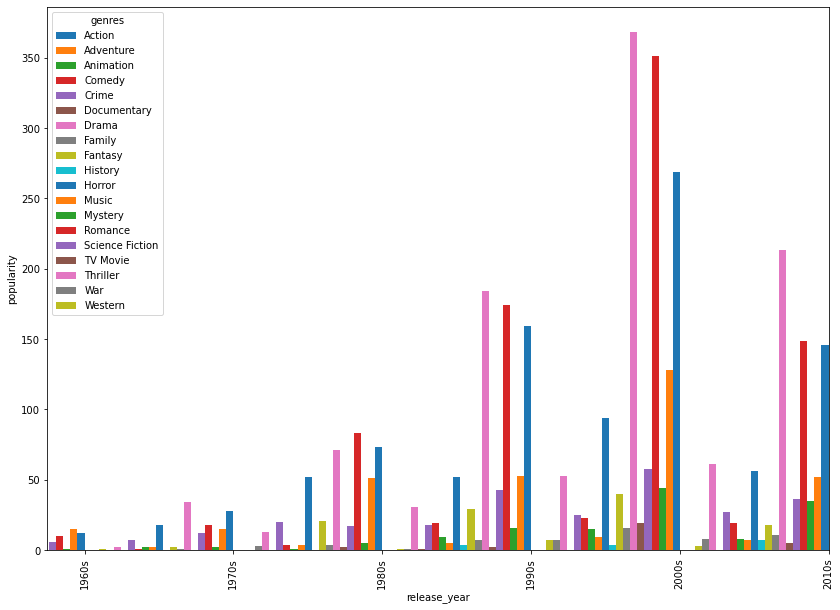

In [30]:
fig, ax = plt.subplots(figsize=(14,10))
df.groupby(["release_year","genres"])['popularity'].size().unstack().plot(kind='bar',ax=ax,width=-.9,align='edge');
ax.set_ylabel('popularity');

This question has shown that The Most Popular Genres differed a lot according to the respective decade as well as The Top Three Genres for each decade are:

+ 1960s: Adventure, Action, Comdey.

+ 1970s: Drama, Action, Horror, comdey.

+ 1980s: Comdey, Drama, Action.

+ 1990s: Drama, Comdey, Action.

+ 2000s: Drama, Comdey, Action.

+ 2010s: Drama, Comdey, Action.

### Research Question 2 ( Which Genres have The Highest average Revenue over Decades? )

In [31]:
pd.pivot_table(df,index="release_year",columns="genres",values='revenue_adj',aggfunc=pd.Series.mean)

genres,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
release_year,,,,,,,,,,,,,,,,,,,
1960s,2.731441e+08,3.839599e+08,3.126928e+08,2.481140e+08,1.386940e+08,NaN,2.861995e+08,1.345551e+09,NaN,3.870526e+08,1.017132e+08,3.226543e+08,8.733419e+07,NaN,3.555466e+08,NaN,NaN,6.895860e+07,1.230217e+08
1970s,1.721027e+08,5.681115e+08,9.490723e+07,2.467087e+08,1.335606e+08,NaN,2.791437e+08,2.154078e+07,1.578399e+08,NaN,2.555789e+08,4.563258e+08,5.060207e+07,1.557275e+08,2.671283e+08,NaN,7.168150e+07,NaN,4.179465e+07
1980s,1.140504e+08,2.278103e+08,1.472569e+08,1.117692e+08,5.620388e+07,8.379384e+06,1.264792e+08,1.223186e+08,2.143721e+08,NaN,6.363549e+07,3.549937e+07,1.847564e+07,2.170476e+08,1.905288e+08,NaN,7.440646e+07,4.775132e+07,NaN
1990s,1.544116e+08,2.703597e+08,2.553253e+08,1.126970e+08,1.559189e+08,4.651366e+07,1.087436e+08,4.013539e+08,1.340855e+08,1.953159e+08,6.118956e+07,1.213227e+08,1.420341e+08,1.650789e+08,1.668681e+08,5.838910e+07,1.008899e+08,2.146450e+07,2.473345e+08
2000s,1.320168e+08,3.114351e+08,3.171352e+08,8.824594e+07,6.920403e+07,2.392594e+07,7.178821e+07,2.278512e+08,2.196253e+08,2.142948e+08,7.662876e+07,1.038387e+08,7.809762e+07,8.806658e+07,1.586893e+08,NaN,1.202866e+08,1.459111e+08,8.272509e+07
2010s,2.404300e+08,2.964165e+08,3.202405e+08,8.157684e+07,7.558890e+07,3.180000e+07,5.005509e+07,2.365620e+08,2.158465e+08,6.351185e+07,5.468618e+07,6.963768e+07,6.160622e+07,1.061665e+08,3.065125e+08,NaN,6.493511e+07,1.945616e+08,1.641861e+08


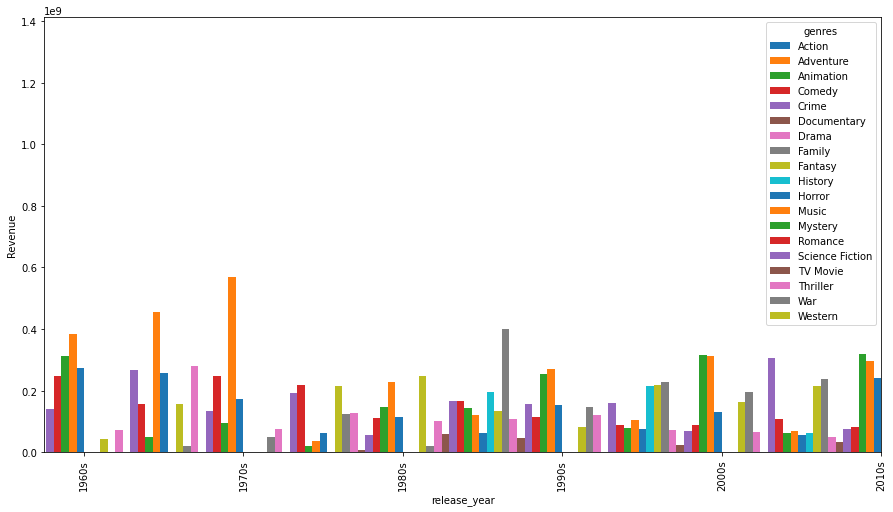

In [32]:
fig, ax = plt.subplots(figsize=(15,8))
pd.pivot_table(df,index="release_year",columns="genres",values='revenue_adj',aggfunc=pd.Series.mean).\
plot(kind='bar',ax=ax,width=-.9,align='edge');
ax.set_ylabel('Revenue');

This question's clarified The Highest Grossing Revenue for each decade:

+ 1960s: Adventure, Animation, Action.

+ 1970s: Adventure, Music, Drama.

+ 1980s: Adventure, Romance, Fantasy.

+ 1990s: Family, Adventure, Western, Animation.

+ 2000s: Animation, Adventure, Family.

+ 2010s: Animation, science fiction, Adventure.

### Research Question 3:  ( Is there a Correlation between Revenue and Popularity? )

In [66]:
corr_matrix = df[df['revenue'] != 0].corr()

In [67]:
corr_matrix['revenue'].sort_values(ascending=False)

revenue         1.000000
revenue_adj     0.900850
vote_count      0.754482
budget          0.688395
budget_adj      0.657407
popularity      0.615369
runtime         0.250828
vote_average    0.227227
Name: revenue, dtype: float64

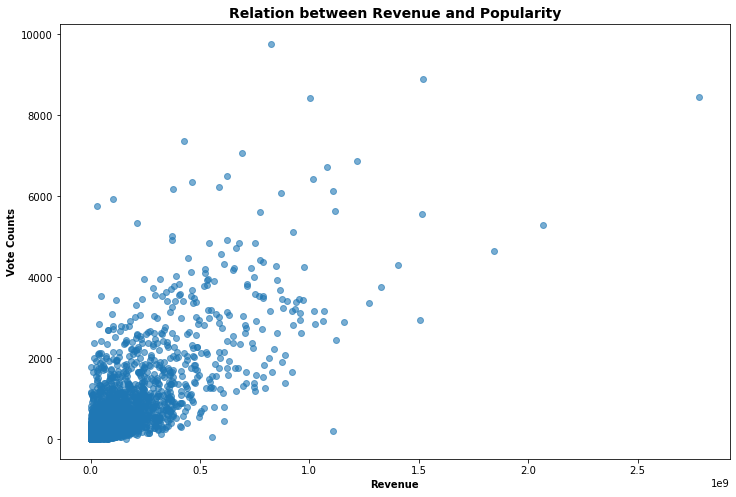

In [71]:
# Plotting the relation between revenue & vote counts
plt.figure(figsize = (12, 8)) # size of the figure
scatter_RP = plt.scatter(df['revenue'],
            df['vote_count'], 
            alpha = 0.6) #transparency level of points on the plot. Used to avoid overplotting
# add and format additional elements, such as titles and axis labels
plt.title("Relation between Revenue and Popularity", 
          fontsize = 14, 
          weight = "bold")
plt.xlabel("Revenue", weight = "bold")
plt.ylabel("Vote Counts", weight = "bold")
plt.show()

+ There're a positive correlation between popularity and revenue. 
+ Meaning The popularity of a movie indicates it'd return a higher revenue
+ proper Marketing for the movie is highly recommended.

### Research Question 4: Correlation between Budget & Revenue

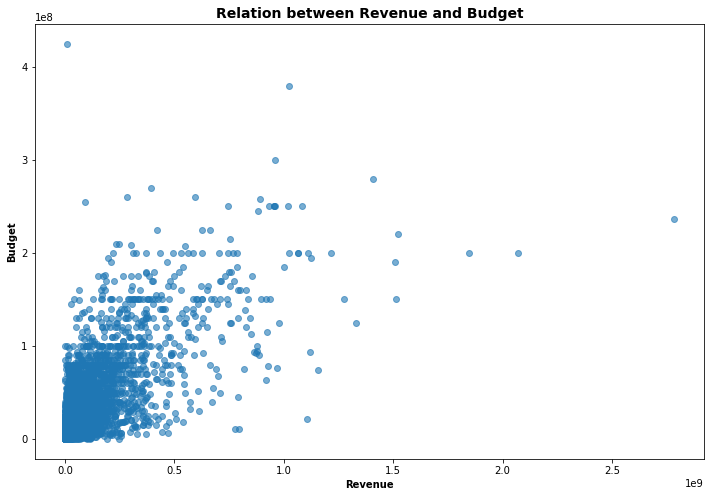

In [73]:
# Plotting revenue against budget:
plt.figure(figsize = (12, 8)) # size of the figure
scatter_RP = plt.scatter(df['revenue'],
            df['budget'], 
            alpha = 0.6) #transparency level of points on the plot. Used to avoid overplotting
# add and format additional elements, such as titles and axis labels
plt.title("Relation between Revenue and Budget", 
          fontsize = 14, 
          weight = "bold")
plt.xlabel("Revenue", weight = "bold")
plt.ylabel("Budget", weight = "bold")
plt.show()

+ There're positive correlations between the two factors 
+ Meaning a proper budget's a vital reason for movie's success.

### Research Question 5: Most Popular Cast members in Highest Grossing Movies.

Text(0.5, 1.0, 'Most Frequent Cast Members in Top 100 Popular Movies')

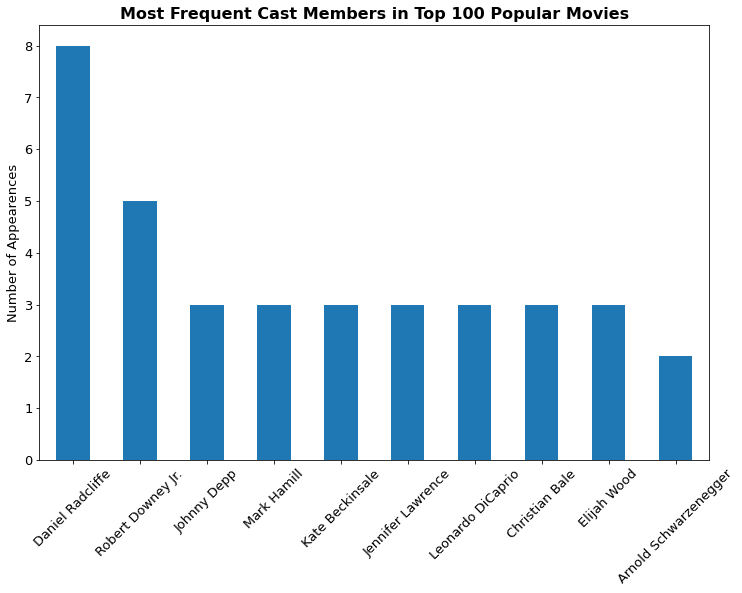

In [61]:
# Counting most frequent cast members in top 100 popular movies:
top_100_df = df.sort_values(by='popularity', ascending=False).head(100)
top_100_cast = pd.Series(top_100_df['cast'].str.cat(sep='|').split('|'))
frequent_cast_in_top_100 = top_100_cast.value_counts(ascending=False).head(10)
frequent_cast_in_top_100.plot(kind='bar', figsize=(12, 8));
plt.xticks(rotation = 45, fontsize = 13) # rotate and format the labels for the x-axis
plt.yticks(fontsize = 13) # format the y-axis
plt.ylabel("Number of Appearences", fontsize = 13) #add a title for the y-axis
plt.title("Most Frequent Cast Members in Top 100 Popular Movies", fontsize = 16, fontweight = "bold") #add and format the title for the chart

+ As indicated from the figure the most popular Actors appear in Multiple popular Movies
    
+ Meaning only the appearance of one of them's important aspect in movie's success

<a id='conclusions'></a>
# Conclusions

## 1. Data Limitations 
    Although our dataset contains more than 10,000 rows it's pretty insufficient to draw precise conclusions :

    1. Most of the data columns are irrelevant for the analysis

    2. many NAN values are missing from our dataset for an uncertain reason (We should try a better web scrapping for a better data quality or prepare data from a different source).

    3. most of the remaining data are 0-valued treated as missing, so the data after cleaning is pretty insufficient.

    4. The data is outdated it may be good to draw some conclusions if we had better data quality, but a lot of changes has occured in the past couple of years that made a huge impact on the Cinema industry such as the streaming services such as Netflix, HBO or Disney plus or the recent global pandemic. 


## 2. Conclusive Insights from our Analysis based on our cleaned data

    1. a sufficient  movie budget is a necessity  for our movie success.

    2. There's an exponential increment in the size of investments in movies overtime.

    3. Interest in movie genres varies overtime period.
